### Section 3 - K Nearest Neighbor
The K-nearest Neighbor is a fairly intuitive algorithm. When checking to see how to classify a new data point, look at n number of the nearest data points. If n=1, then which ever data point is closest to the new data point, that new data point will be grouped with its nearest neighbor.

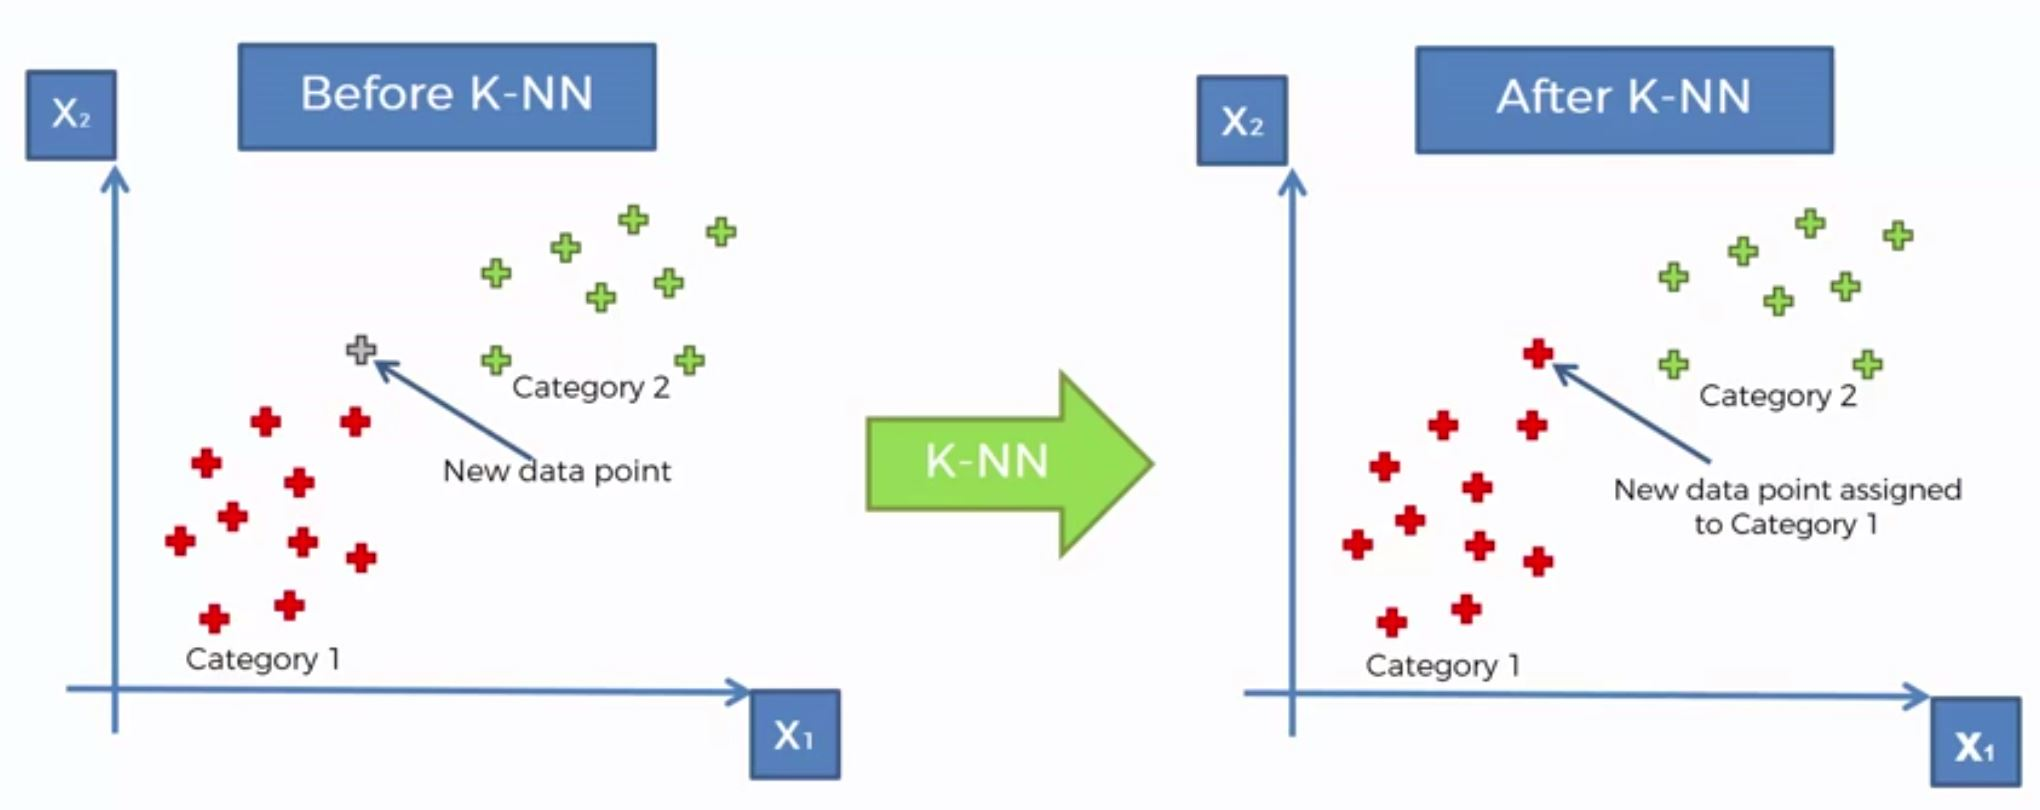

In [1]:
from IPython.display import Image
Image(filename='./images/05.jpg', width=500)

### Steps of K Nearest Neighbor
1. Choose number of K Neighbors
2. Take the K nearest neighbors of the new data point according to the Euclidean distance. 
3. Among these K neighbors, count the number of data points in each category
4. Assign the new point to the category where you counted the most neighbors

In [2]:
import numpy as np   #Mathematics library
import matplotlib.pyplot as plt # for plotting
import pandas as pd  #manage datasets
import seaborn as sea
import scipy.stats as stats
import sklearn

In [3]:
df = pd.read_csv('ImputeMissing.csv')
df=df.drop('Unnamed: 0',axis=1)

In [4]:
###Convert 15 Categorical to Dummies
df=pd.get_dummies(df,columns=['Auction','Make','Model','Trim','Color','Transmission','WheelType','Nationality','Size','TopThreeAmericanName','PRIMEUNIT','AUCGUART','VNZIP1','VNST','IsOnlineSale'],drop_first=True)


In [5]:
# Importing the dataset
dataset = df
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### DIMENSIONALITY REDUCTION - FEATURE EXTRACTION

In [8]:
# Applying PCA
"""
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance
"""

'\nfrom sklearn.decomposition import PCA\npca = PCA(n_components = 10)\nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)\nexplained_variance = pca.explained_variance_ratio_\nexplained_variance\n'

In [9]:
# Applying LDA 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


C:\Users\volak\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [10]:
# Applying Kernel PCA
"""
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 10, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)
"""

"\nfrom sklearn.decomposition import KernelPCA\nkpca = KernelPCA(n_components = 10, kernel = 'rbf')\nX_train = kpca.fit_transform(X_train)\nX_test = kpca.transform(X_test)\n"

### Training the K Nearest Neighbor Algorithm

In [11]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) #p=2 is euclidean, p=1 is manhattan distance
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Testing Model Accuracy

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15524,   486],
       [ 1643,   593]])

In [14]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.88331689137345171

In [15]:
# Precision 
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)


0.54958294717330858

In [16]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)


0.26520572450805008

In [17]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)


0.35776772247360483

In [18]:
# Cohen's kappa
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)


0.3020913937753944

In [19]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()


0.8871878296357828

In [20]:
accuracies.std()

0.0027585712169303123